<a href="https://colab.research.google.com/github/Shubham-Govardhane/Shubham-Govardhane/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# checking the shape 
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.shape

(283726, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


0    99.83329
1     0.16671
Name: Class, dtype: float64


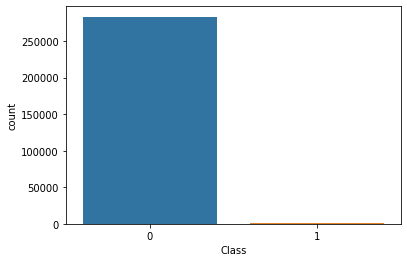

In [ ]:
print(df['Class'].value_counts()/df['Class'].count()*100)
sns.countplot(df['Class'])

In [ ]:
# Drop unnecessary columns
df.drop('Time', axis = 1, inplace= True)
df.shape

(283726, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
# store features matrix in X and Y
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
# Do it oversampling because data is imbalancing
from imblearn.over_sampling import SMOTE
x_res,y_res= SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_res,y_res,test_size=0.20,random_state=42)

Accuracy :  0.9112548763481668
Precision :  0.9713278259117469
Recall :  0.8481324442724186
f1 Score :  0.9055593646977055


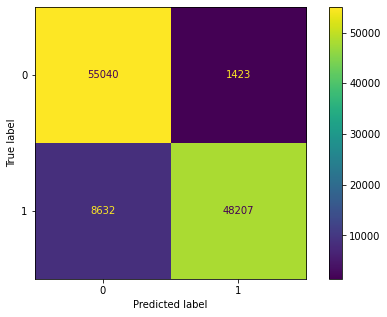

In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred1 = nb.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred1))
print("Precision : ",metrics.precision_score(y_test,y_pred1))
print("Recall : ",metrics.recall_score(y_test,y_pred1))
print("f1 Score : ",metrics.f1_score(y_test,y_pred1))
metrics.plot_confusion_matrix(nb,x_test,y_test)

In [ ]:
metric_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_Score'])
metric_df.loc[len(metric_df)] = (['Naive bayes',metrics.accuracy_score(y_test,y_pred1),metrics.precision_score(y_test,y_pred1)
                 ,metrics.recall_score(y_test,y_pred1),metrics.f1_score(y_test,y_pred1)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911255,0.971328,0.848132,0.905559


Logistic Regression

Accuracy :  0.9439639194365501
Precision :  0.9724696810899836
Recall :  0.9141786449444923
f1 Score :  0.9424236653335872


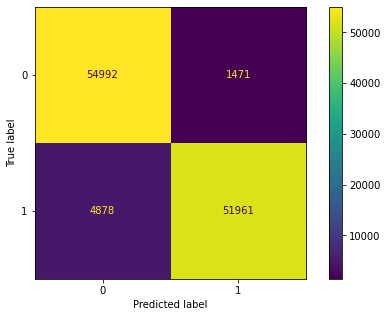

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred2 = lg.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred2))
print("Precision : ",metrics.precision_score(y_test,y_pred2))
print("Recall : ",metrics.recall_score(y_test,y_pred2))
print("f1 Score : ",metrics.f1_score(y_test,y_pred2))
metrics.plot_confusion_matrix(lg,x_test,y_test)

In [ ]:
metric_df.loc[len(metric_df)] = (['Logistics Regression',metrics.accuracy_score(y_test,y_pred2),metrics.precision_score(y_test,y_pred2)
                 ,metrics.recall_score(y_test,y_pred2),metrics.f1_score(y_test,y_pred2)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911255,0.971328,0.848132,0.905559
1,Logistics Regression,0.943964,0.972470,0.914179,0.942424


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred3 = rf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred3))
print("Precision : ",metrics.precision_score(y_test,y_pred3))
print("Recall : ",metrics.recall_score(y_test,y_pred3))
print("f1 score : ",metrics.f1_score(y_test,y_pred3))

Accuracy :  0.9999205662742052
Precision :  0.9998416830847171
Recall :  1.0
f1 score :  0.999920835275801


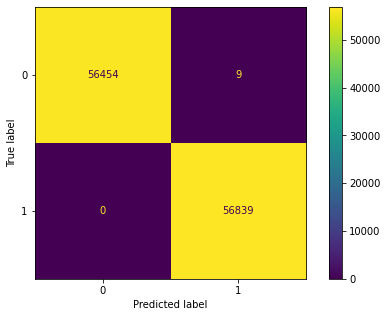

In [ ]:
metrics.plot_confusion_matrix(rf,x_test,y_test)

In [ ]:
metric_df.loc[len(metric_df)] = (['Random Forest',metrics.accuracy_score(y_test,y_pred3),metrics.precision_score(y_test,y_pred3)
                 ,metrics.recall_score(y_test,y_pred3),metrics.f1_score(y_test,y_pred3)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911255,0.971328,0.848132,0.905559
1,Logistics Regression,0.943964,0.972470,0.914179,0.942424
2,Random Forest,0.999921,0.999842,1.000000,0.999921


XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred4 = xgb.predict(x_test)

Accuracy :  0.9757374097544615
Precision :  0.9876839296018465
Recall :  0.963651718010521
f1 Score :  0.9755198361458657


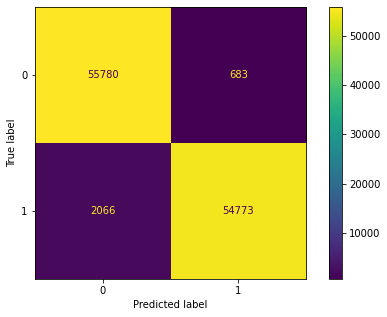

In [ ]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred4))
print("Precision : ",metrics.precision_score(y_test,y_pred4))
print("Recall : ",metrics.recall_score(y_test,y_pred4))
print("f1 Score : ",metrics.f1_score(y_test,y_pred4))
metrics.plot_confusion_matrix(xgb,x_test,y_test)

In [ ]:
metric_df.loc[len(metric_df)] = (['XGBoost',metrics.accuracy_score(y_test,y_pred4),metrics.precision_score(y_test,y_pred4)
                 ,metrics.recall_score(y_test,y_pred4),metrics.f1_score(y_test,y_pred4)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911255,0.971328,0.848132,0.905559
1,Logistics Regression,0.943964,0.972470,0.914179,0.942424
2,Random Forest,0.999921,0.999842,1.000000,0.999921
3,XGBoost,0.975737,0.987684,0.963652,0.975520


**HyperParameter Tuning**
       -  Naive Bayes

In [ ]:
grid_params = {'var_smoothing':[1/(10**x) for x in range(0,16)]}

nb_hpt = GridSearchCV(GaussianNB(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
nb_hpt.fit(x_train, y_train)
nb_hpt.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'var_smoothing': 0.001}

Accuracy :  0.9115902631904115
Precision :  0.9730068291105992
Recall :  0.8472703601400446
f1_Score :  0.9057959429339902


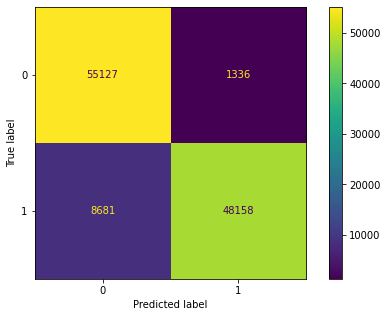

In [ ]:
nb_hpt = GaussianNB(var_smoothing = 0.001)
nb_hpt.fit(x_train,y_train)
y_hpt_pred1 = nb_hpt.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_hpt_pred1))
print("Precision : ",metrics.precision_score(y_test,y_hpt_pred1))
print("Recall : ",metrics.recall_score(y_test,y_hpt_pred1))
print("f1_Score : ",metrics.f1_score(y_test,y_hpt_pred1))
metrics.plot_confusion_matrix(nb_hpt,x_test,y_test)

In [ ]:
hpt_metric_df = pd.DataFrame(columns=['HyperParameter Model','Accuracy','Precision','Recall','f1_Score'])
hpt_metric_df.loc[len(hpt_metric_df)] = (['Naive bayes',metrics.accuracy_score(y_test,y_hpt_pred1),metrics.precision_score(y_test,y_hpt_pred1)
                 ,metrics.recall_score(y_test,y_hpt_pred1),metrics.f1_score(y_test,y_hpt_pred1)])
hpt_metric_df

,HyperParameter Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.91159,0.973007,0.84727,0.905796


**HyperParameter Tuning** - Logistic Regression

In [ ]:
grid_params = {'penalty':['l1', 'l2', 'elasticnet','none'],
              'C':[0.25,0.5,0.75,1.0,1.25]}

lg_hpt = GridSearchCV(LogisticRegression(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
lg_hpt.fit(x_train, y_train)
lg_hpt.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'C': 0.25, 'penalty': 'none'}

Accuracy :  0.9439639194365501
Precision :  0.9724519968559344
Recall :  0.9141962384982143
f1_Score :  0.9424247095843952


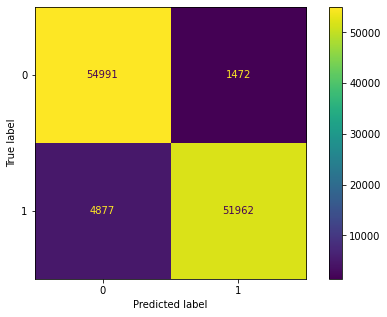

In [ ]:
lg_hpt = LogisticRegression(C= 0.25, penalty= 'none')
lg_hpt.fit(x_train,y_train)
y_hpt_pred2 = lg_gs.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_hpt_pred2))
print("Precision : ",metrics.precision_score(y_test,y_hpt_pred2))
print("Recall : ",metrics.recall_score(y_test,y_hpt_pred2))
print("f1_Score : ",metrics.f1_score(y_test,y_hpt_pred2))
metrics.plot_confusion_matrix(lg_hpt,x_test,y_test)

In [ ]:
hpt_metric_df.loc[len(hpt_metric_df)] = (['Logistic Regression',metrics.accuracy_score(y_test,y_hpt_pred2),metrics.precision_score(y_test,y_hpt_pred2)
                 ,metrics.recall_score(y_test,y_hpt_pred2),metrics.f1_score(y_test,y_hpt_pred2)])
hpt_metric_df

,HyperParameter Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911590,0.973007,0.847270,0.905796
1,Logistic Regression,0.943964,0.972452,0.914196,0.942425


**HyperParameter Tuning** - Random Forest

In [ ]:
grid_params = {'max_features':['sqrt','log2','none']}

rf_hpt = RandomizedSearchCV(RandomForestClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='recall',cv=3,n_iter=10)
rf_hpt.fit(x_train, y_train)
rf_hpt.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'max_features': 'sqrt'}

Accuracy :  0.9999205662742052
Precision :  0.9998416830847171
Recall :  1.0
f1 score :  0.999920835275801


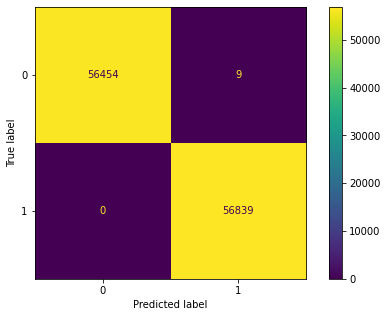

In [ ]:
rf_hpt = RandomForestClassifier(max_features='sqrt')

rf_hpt.fit(x_train,y_train)
y_hpt_pred3 = rf_hpt.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_hpt_pred3))
print("Precision : ",metrics.precision_score(y_test,y_hpt_pred3))
print("Recall : ",metrics.recall_score(y_test,y_hpt_pred3))
print("f1 score : ",metrics.f1_score(y_test,y_hpt_pred3))
metrics.plot_confusion_matrix(rf_hpt,x_test,y_test)

In [ ]:
hpt_metric_df.loc[len(hpt_metric_df)] = (['Random Forest',metrics.accuracy_score(y_test,y_hpt_pred3),metrics.precision_score(y_test,y_hpt_pred3)
                 ,metrics.recall_score(y_test,y_hpt_pred3),metrics.f1_score(y_test,y_hpt_pred3)])
hpt_metric_df

,HyperParameter Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911590,0.973007,0.847270,0.905796
1,Logistic Regression,0.943964,0.972452,0.914196,0.942425
2,Random Forest,0.999921,0.999842,1.000000,0.999921


**HyperParameter Tuning** - XGBoost

In [ ]:
grid_params = {'eta': [0.5,0.6,0.7]}

xgb_hpt = RandomizedSearchCV(XGBClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3,n_iter=10)
xgb_hpt.fit(x_train, y_train)
xgb_hpt.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'eta': 0.5}

Accuracy :  0.9757374097544615
Precision :  0.9876839296018465
Recall :  0.963651718010521
f1 score :  0.9755198361458657


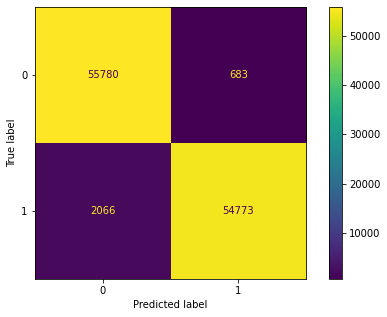

In [ ]:
xgb_hpt = XGBClassifier(eta=0.5)

xgb_hpt.fit(x_train,y_train)
y_hpt_pred4 = xgb_hpt.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_hpt_pred4))
print("Precision : ",metrics.precision_score(y_test,y_hpt_pred4))
print("Recall : ",metrics.recall_score(y_test,y_hpt_pred4))
print("f1 score : ",metrics.f1_score(y_test,y_hpt_pred4))
metrics.plot_confusion_matrix(xgb_hpt,x_test,y_test)

In [ ]:
hpt_metric_df.loc[len(hpt_metric_df)] = (['XGBoost',metrics.accuracy_score(y_test,y_hpt_pred4),metrics.precision_score(y_test,y_hpt_pred4)
                 ,metrics.recall_score(y_test,y_hpt_pred4),metrics.f1_score(y_test,y_hpt_pred4)])
hpt_metric_df

,HyperParameter Model,Accuracy,Precision,Recall,f1_Score
0,Naive bayes,0.911590,0.973007,0.847270,0.905796
1,Logistic Regression,0.943964,0.972452,0.914196,0.942425
2,Random Forest,0.999921,0.999842,1.000000,0.999921
3,XGBoost,0.975737,0.987684,0.963652,0.975520
